In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score, accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("air quality data.csv")

In [3]:
df.head(10)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN
1,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN
2,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN
3,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN
4,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN
5,Ahmedabad,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN
6,Ahmedabad,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN
7,Ahmedabad,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN
8,Ahmedabad,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN
9,Ahmedabad,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29531 non-null  object 
 1   PM2.5    24933 non-null  float64
 2   PM10     18391 non-null  float64
 3   NO       25949 non-null  float64
 4   NO2      25946 non-null  float64
 5   NOx      25346 non-null  float64
 6   NH3      19203 non-null  float64
 7   CO       27472 non-null  float64
 8   SO2      25677 non-null  float64
 9   O3       25509 non-null  float64
 10  Benzene  23908 non-null  float64
 11  Toluene  21490 non-null  float64
 12  Xylene   11422 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 3.2+ MB


In [5]:
df.isnull().sum()

City           0
PM2.5       4598
PM10       11140
NO          3582
NO2         3585
NOx         4185
NH3        10328
CO          2059
SO2         3854
O3          4022
Benzene     5623
Toluene     8041
Xylene     18109
AQI         4681
dtype: int64

In [6]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [7]:
df.duplicated().sum()

2297

In [8]:
df1 = df.dropna(subset=['AQI'],inplace=True)

In [9]:
df.isnull().sum().sort_values(ascending=False)

Xylene     15372
PM10        7086
NH3         6536
Toluene     5826
Benzene     3535
NOx         1857
O3           807
PM2.5        678
SO2          605
CO           445
NO2          391
NO           387
City           0
AQI            0
dtype: int64

In [10]:
df.shape

(24850, 14)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [12]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [13]:
null_values_percentage

Xylene     61.859155
PM10       28.515091
NH3        26.301811
Toluene    23.444668
Benzene    14.225352
NOx         7.472837
O3          3.247485
PM2.5       2.728370
SO2         2.434608
CO          1.790744
NO2         1.573441
NO          1.557344
City        0.000000
AQI         0.000000
dtype: float64

write key considetrations

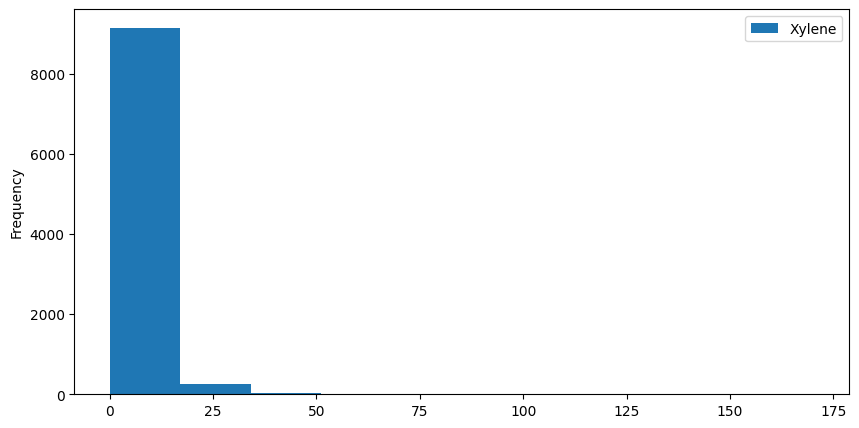

In [14]:
df['Xylene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

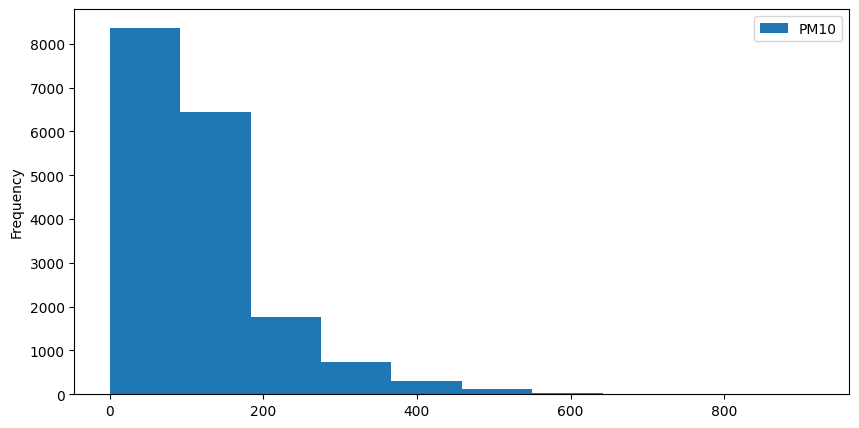

In [15]:
df['PM10'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

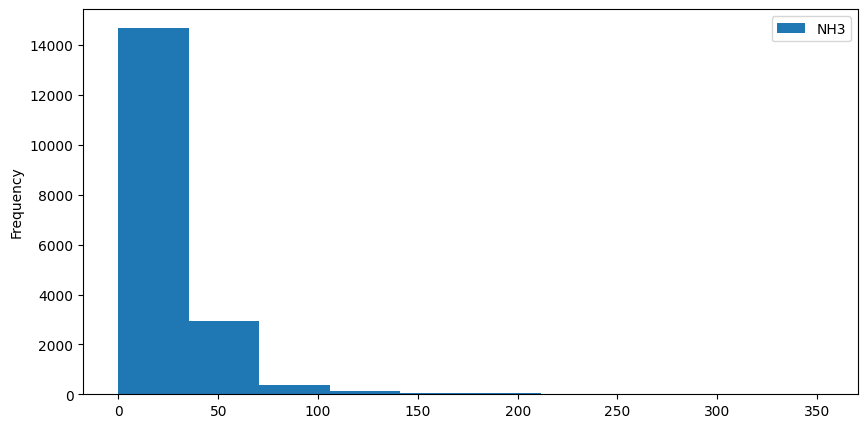

In [16]:
df['NH3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

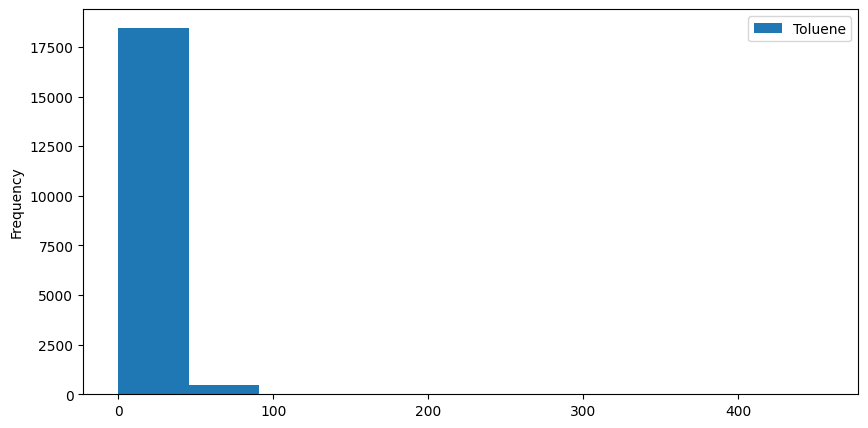

In [17]:
df['Toluene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

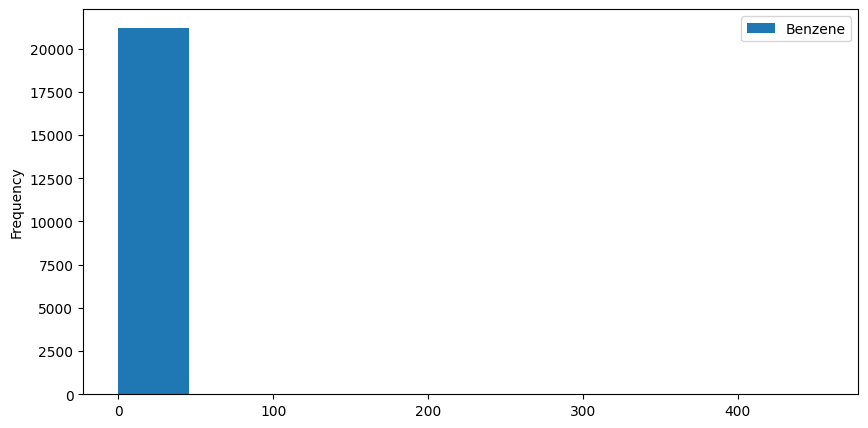

In [18]:
df['Benzene'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

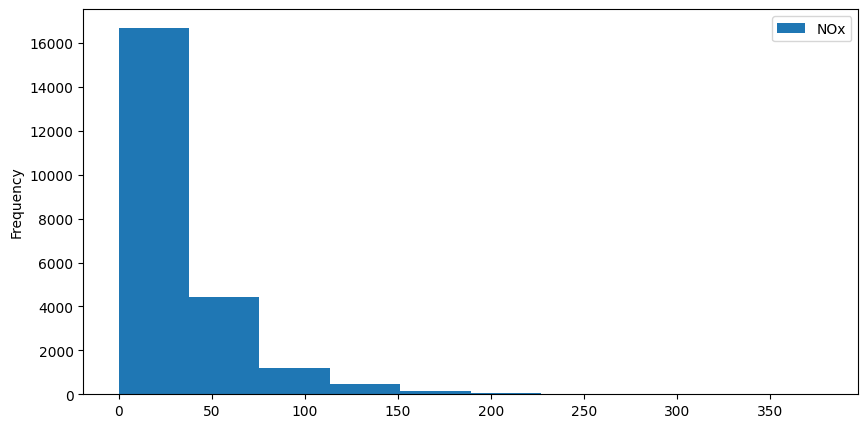

In [19]:
df['NOx'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

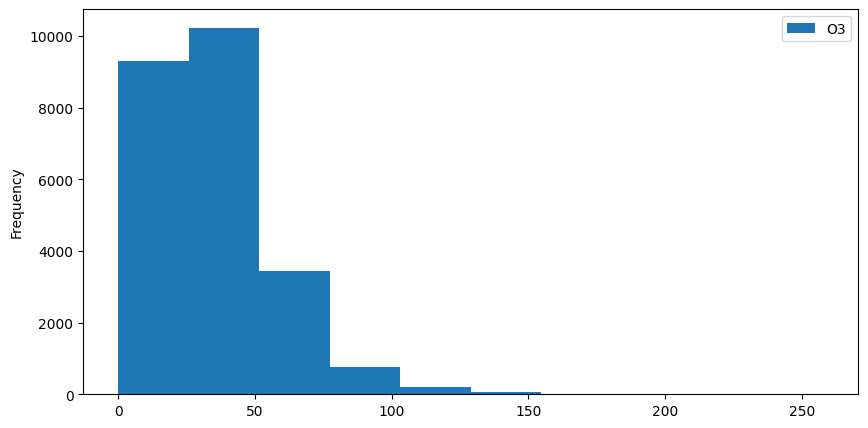

In [20]:
df['O3'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

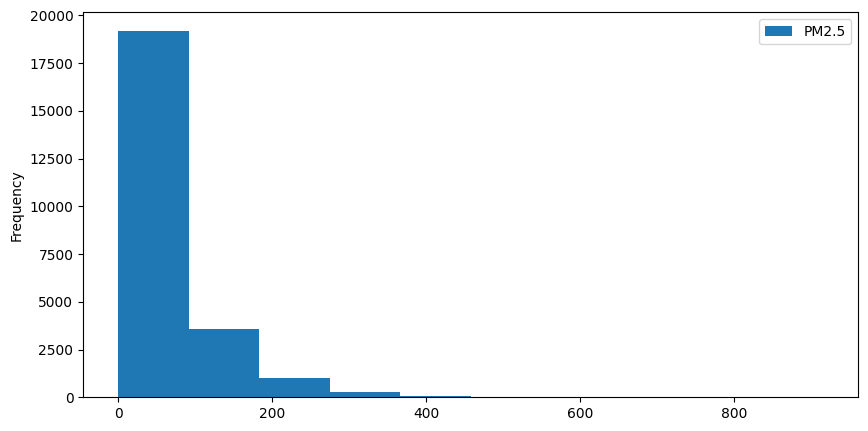

In [21]:
df['PM2.5'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

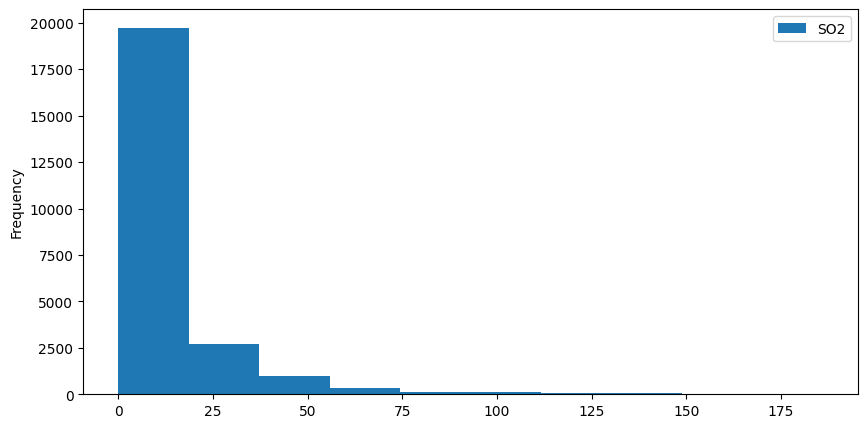

In [22]:
df['SO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

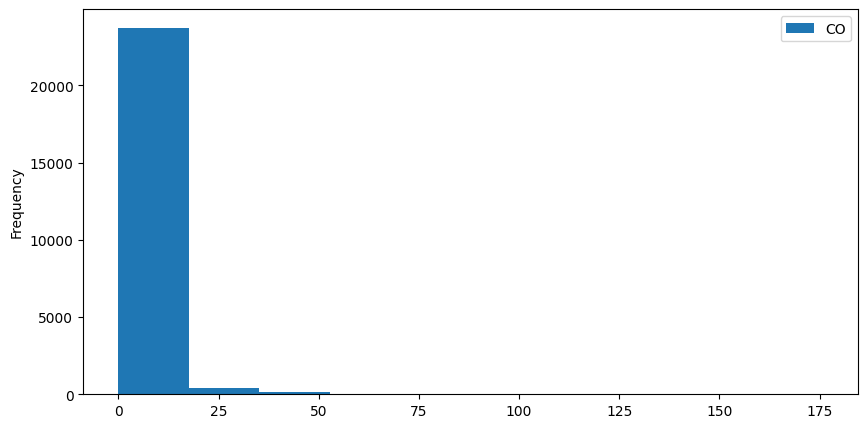

In [23]:
df['CO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

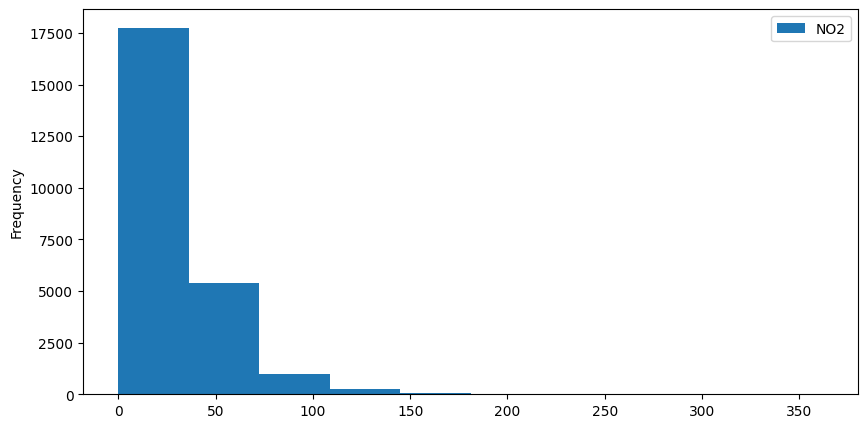

In [24]:
df['NO2'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

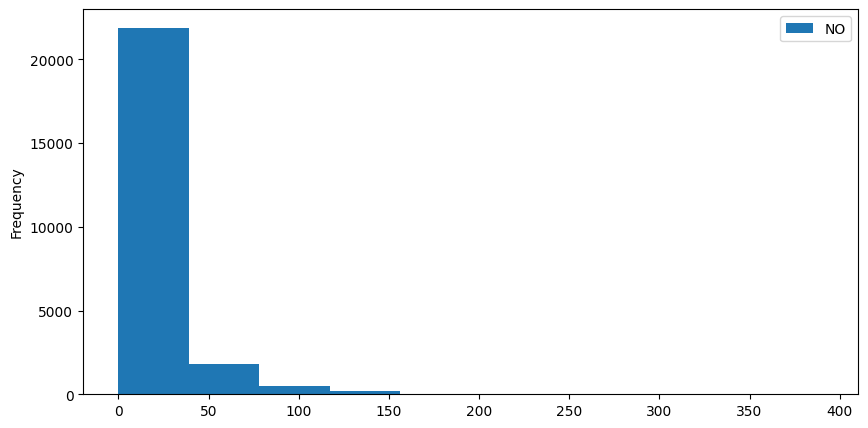

In [25]:
df['NO'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

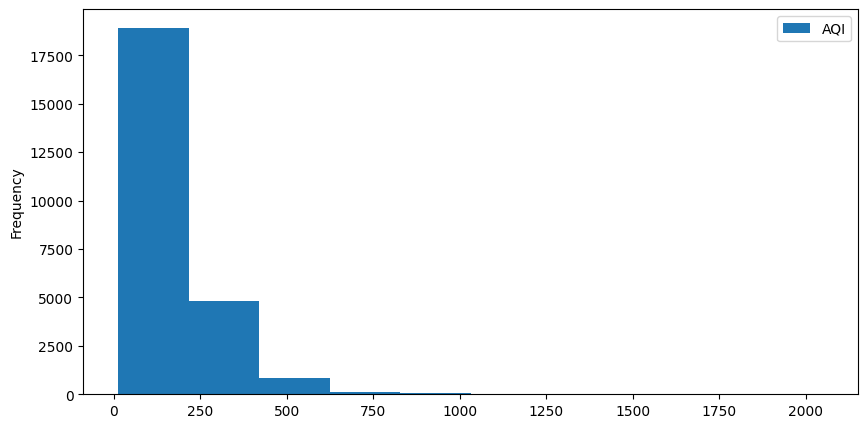

In [26]:
df['AQI'].plot(kind='hist',figsize=(10,5))
plt.legend()
plt.show()

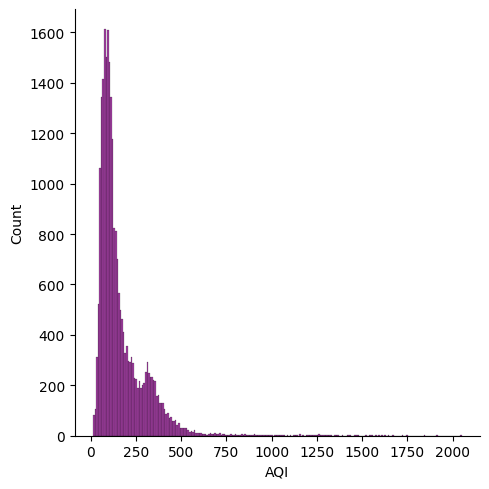

In [27]:
sns.displot(df,x='AQI',color='purple')
plt.show()

BIVARIANT ANALYSIS

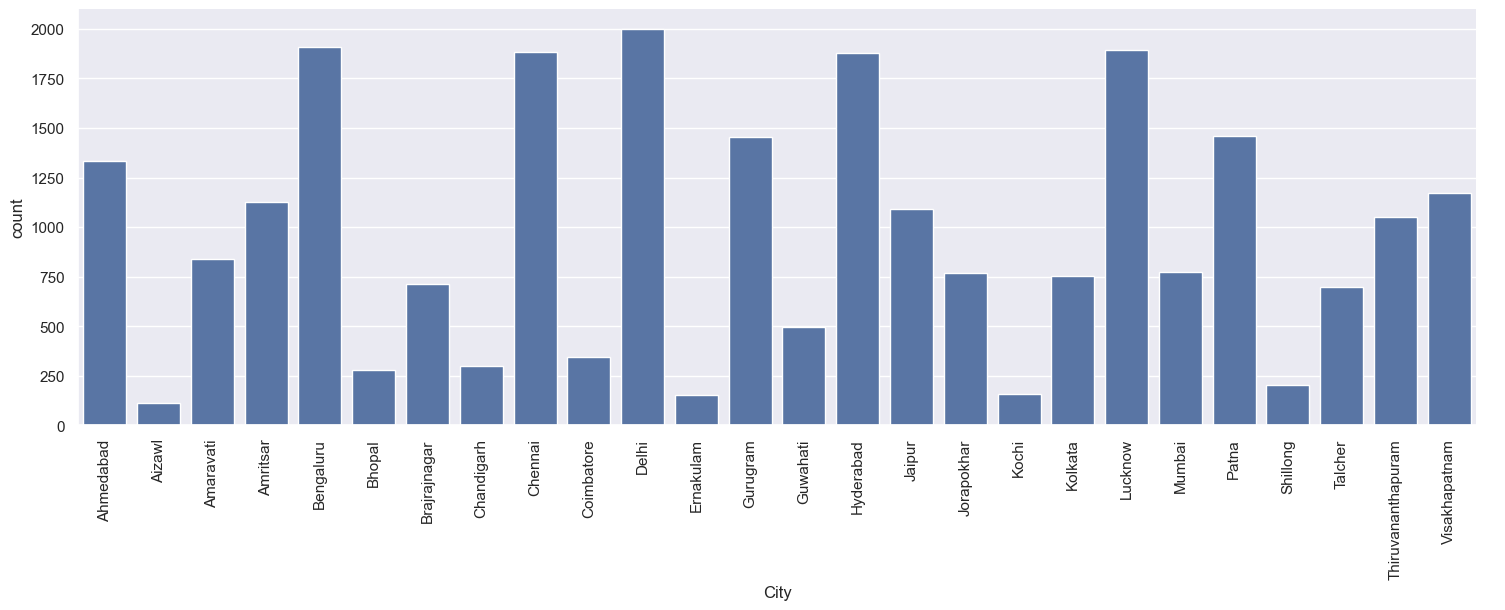

In [28]:
sns.set(style='darkgrid')
graphs=sns.catplot(x='City',kind='count',data=df,height=5,aspect=3)
graphs.set_xticklabels(rotation=90)

In [29]:
df.describe().loc['mean']

PM2.5       67.476613
PM10       118.454435
NO          17.622421
NO2         28.978391
NOx         32.289012
NH3         23.848366
CO           2.345267
SO2         14.362933
O3          34.912885
Benzene      3.458668
Toluene      9.525714
Xylene       3.588683
AQI        166.463581
Name: mean, dtype: float64

In [30]:
df.describe().loc['std']

PM2.5       63.075398
PM10        89.487976
NO          22.421138
NO2         24.627054
NOx         30.712855
NH3         25.875981
CO           7.075208
SO2         17.428693
O3          21.724525
Benzene     16.036020
Toluene     20.881085
Xylene       6.754324
AQI        140.696585
Name: std, dtype: float64

In [31]:
df.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [32]:
# REPLACING NULL VALUES IN EVERY COLUMN WITH THEIR MEAN VALUES 
df = df.replace({
    "PM2.5" : {np.nan:67.476613},
    "PM10" : {np.nan:118.454435},
    "NO" :  {np.nan:17.622421},
    "NO2" :  {np.nan:28.978391},
    "NOx" :  {np.nan:32.289012},
    "NH3" :  {np.nan:23.848366},
    "CO" :  {np.nan:2.345267},
    "SO2" :  {np.nan:14.362933},
    "O3" :  {np.nan:34.912885},
    "Benzene" :  {np.nan:3.458668},
    "Toluene" :  {np.nan:9.525714},
    "Xylene" :  {np.nan:3.588683}
})

In [33]:
df.isnull().sum()

City       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

<Axes: >

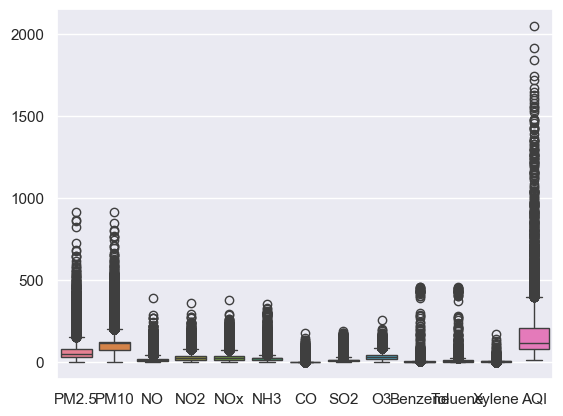

In [34]:
sns.boxplot(data=df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI']])

In [35]:
# removing outliers
def replace_outliers_with_quartiles(df):
    for column in df.select_dtypes(include=['number']).columns:
        q1 =df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3-q1
        lower_bond=q1-1.5*IQR
        upper_bond=q3+1.5*IQR
        df[column]=df[column].apply(
        lambda x: q1 if x<lower_bond else (q3 if x>upper_bond else x)
        )
    return df
df = replace_outliers_with_quartiles(df)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24850 entries, 28 to 29530
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     24850 non-null  object 
 1   PM2.5    24850 non-null  float64
 2   PM10     24850 non-null  float64
 3   NO       24850 non-null  float64
 4   NO2      24850 non-null  float64
 5   NOx      24850 non-null  float64
 6   NH3      24850 non-null  float64
 7   CO       24850 non-null  float64
 8   SO2      24850 non-null  float64
 9   O3       24850 non-null  float64
 10  Benzene  24850 non-null  float64
 11  Toluene  24850 non-null  float64
 12  Xylene   24850 non-null  float64
 13  AQI      24850 non-null  float64
dtypes: float64(13), object(1)
memory usage: 2.8+ MB


<Axes: >

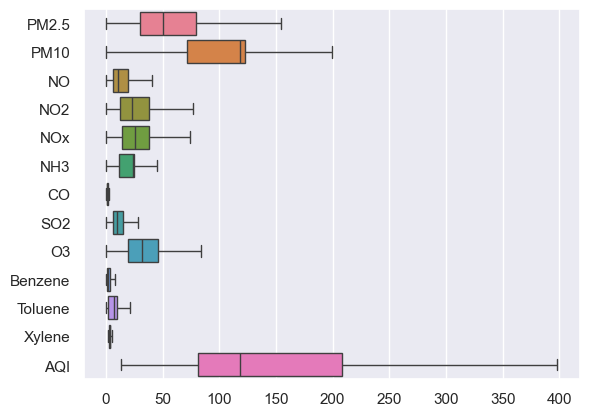

In [37]:
sns.boxplot(data=df[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI']],orient='h')

In [38]:
df1=df.drop(columns=['City'])

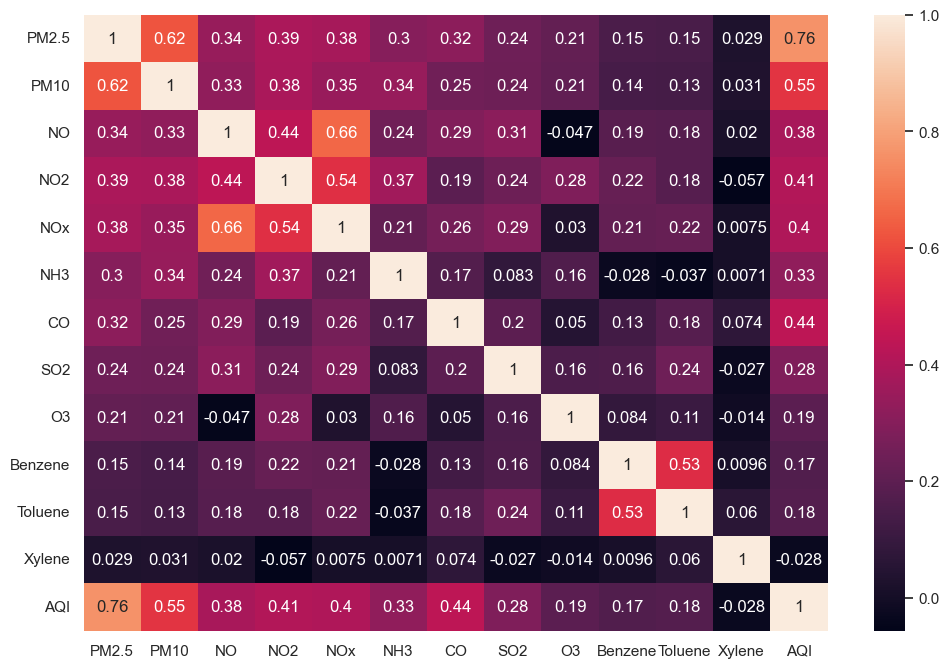

In [39]:
# multivariate analysis
# CORRELATION MATRIX - 
# identifying highly correlated features, which can help in feature selection and model building.
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [40]:
df.drop(['City'],axis=1,inplace=True)
df.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000,209.0
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000,328.0
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683,208.0
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683,208.0
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683,208.0


## DATA MODELING

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [42]:
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [43]:
# data preparation for modeling
x = df[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene']]
y = df[['AQI']]

In [44]:
x.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
28,83.1300,118.454435,6.93,28.71,33.72,23.848366,1.53,14.89,59.7600,0.02,0.00,3.140000
29,79.8400,118.454435,13.85,28.68,41.08,23.848366,1.53,14.89,45.3975,0.04,0.00,4.810000
30,94.5200,118.454435,24.39,32.66,52.61,23.848366,1.53,14.89,45.3975,0.24,0.01,3.588683
31,135.9900,118.454435,19.71,42.08,38.17,23.848366,1.53,14.89,45.3975,0.40,0.04,3.588683
32,79.5075,118.454435,19.71,35.31,72.80,23.848366,1.53,14.89,45.3975,0.46,0.06,3.588683


In [45]:
# splitting the data into training and testing data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(19880, 12) (4970, 12) (19880, 1) (4970, 1)


## LINEAR REGRESSION

In [46]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [47]:
# predicting train
train_pred = model.predict(X_train)
# predicting on test
test_pred = model.predict(X_test)

In [48]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData ",str(RMSE_train))
print('RMSE TestData ',str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',model.score(X_train,Y_train))
print('RSquared value on test: ',model.score(X_test,Y_test))

RMSE TrainingData  51.70703411023219
RMSE TestData  50.98891707971116
--------------------------------------------------
RSquared value on train:  0.6510670631277098
RSquared value on test:  0.6561645891946594


## K-NEAREST NEIGHBOURS

In [49]:
KNN = KNeighborsRegressor()
KNN.fit(X_train,Y_train)

KNeighborsRegressor()

In [50]:
# predicting train
train_pred = KNN.predict(X_train)
# predicting on test
test_pred = KNN.predict(X_test)

In [51]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData ",str(RMSE_train))
print('RMSE TestData ',str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',KNN.score(X_train,Y_train))
print('RSquared value on test: ',KNN.score(X_test,Y_test))

RMSE TrainingData  35.55480888160764
RMSE TestData  42.64846856837141
--------------------------------------------------
RSquared value on train:  0.8350169197435091
RSquared value on test:  0.759449697735837


## DECISION TREE REGRESSOR

In [52]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [53]:
# predicting train
train_pred = DT.predict(X_train)
# predicting on test
test_pred = DT.predict(X_test)

In [54]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData ",str(RMSE_train))
print('RMSE TestData ',str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',DT.score(X_train,Y_train))
print('RSquared value on test: ',DT.score(X_test,Y_test))

RMSE TrainingData  2.617779683045854
RMSE TestData  46.973422933717934
--------------------------------------------------
RSquared value on train:  0.9991056471481347
RSquared value on test:  0.7081878023628719


## RANDOM FOREST REGRESSOR

In [55]:
RF = RandomForestRegressor()
RF.fit(X_train,Y_train)

RandomForestRegressor()

In [56]:
# predicting train
train_pred = RF.predict(X_train)
# predicting on test
test_pred = RF.predict(X_test)

In [57]:
RMSE_train = (np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test = (np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData ",str(RMSE_train))
print('RMSE TestData ',str(RMSE_test))
print('-'*50)
print('RSquared value on train: ',RF.score(X_train,Y_train))
print('RSquared value on test: ',RF.score(X_test,Y_test))

RMSE TrainingData  13.154518295677853
RMSE TestData  33.62459979035598
--------------------------------------------------
RSquared value on train:  0.9774164293132028
RSquared value on test:  0.8504751853355883
